## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.math.multiply (TFOpLambda (None, 512)               0         
_________________________________________________________________
tf.__operators__.add (TFOpLa (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
tf.math.multiply_1 (TFOpLamb (None, 256)               0         
_________________________________________________________________
tf.__operators__.add_1 (TFOp (None, 256)               0     

C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
49/49 [==============================] - 2s 38ms/step - loss: 2.2381 - accuracy: 0.1856 - val_loss: 2.1313 - val_accuracy: 0.2561
Epoch 2/50
49/49 [==============================] - 2s 33ms/step - loss: 2.0569 - accuracy: 0.2742 - val_loss: 1.9892 - val_accuracy: 0.3038
Epoch 3/50
49/49 [==============================] - 2s 33ms/step - loss: 1.9468 - accuracy: 0.3159 - val_loss: 1.9073 - val_accuracy: 0.3305
Epoch 4/50
49/49 [==============================] - 2s 35ms/step - loss: 1.8807 - accuracy: 0.3393 - val_loss: 1.8568 - val_accuracy: 0.3497
Epoch 5/50
49/49 [==============================] - 2s 41ms/step - loss: 1.8382 - accuracy: 0.3555 - val_loss: 1.8222 - val_accuracy: 0.3589
Epoch 6/50
49/49 [==============================] - 2s 42ms/step - loss: 1.8080 - accuracy: 0.3665 - val_loss: 1.7961 - val_accuracy: 0.3694
Epoch 7/50
49/49 [==============================] - 2s 41ms/step - loss: 1.7833 - accuracy: 0.3756 - val_loss: 1.7723 - val_accuracy: 0.3802
Epoch 8/50
49

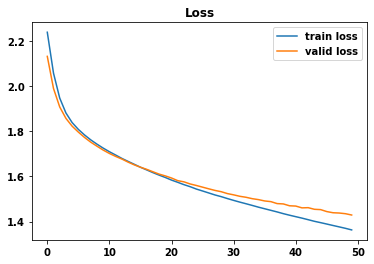

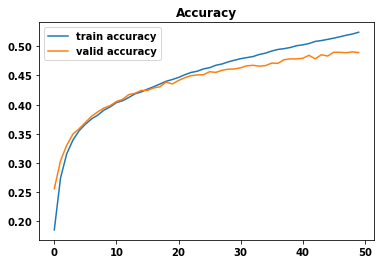

In [7]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=10,
                          verbose=1
                          )
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
          )

    # Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.math.multiply_3 (TFOpLamb (None, 512)               0         
_________________________________________________________________
tf.__operators__.add_3 (TFOp (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
tf.math.multiply_4 (TFOpLamb (None, 256)               0         
_________________________________________________________________
tf.__operators__.add_4 (TFOp (None, 256)               0   

49/49 [==============================] - 2s 35ms/step - loss: 1.3683 - accuracy: 0.5209 - val_loss: 1.4326 - val_accuracy: 0.4909
Epoch 47/50
49/49 [==============================] - 2s 37ms/step - loss: 1.3615 - accuracy: 0.5242 - val_loss: 1.4318 - val_accuracy: 0.4932
Epoch 48/50
49/49 [==============================] - 2s 35ms/step - loss: 1.3560 - accuracy: 0.5243 - val_loss: 1.4262 - val_accuracy: 0.4947
Epoch 49/50
49/49 [==============================] - 2s 35ms/step - loss: 1.3489 - accuracy: 0.5274 - val_loss: 1.4236 - val_accuracy: 0.4919
Epoch 50/50
49/49 [==============================] - 2s 35ms/step - loss: 1.3426 - accuracy: 0.5301 - val_loss: 1.4168 - val_accuracy: 0.4947


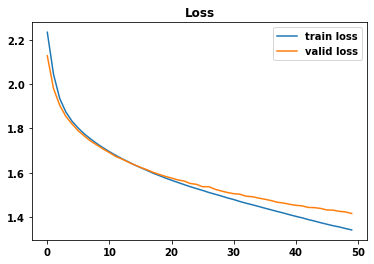

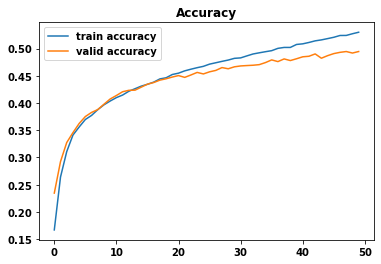

In [8]:
earlystop = EarlyStopping(monitor="val_loss", 
                          patience=10,
                          verbose=1
                          )
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
          )

    # Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.math.multiply_6 (TFOpLamb (None, 512)               0         
_________________________________________________________________
tf.__operators__.add_6 (TFOp (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
tf.math.multiply_7 (TFOpLamb (None, 256)               0         
_________________________________________________________________
tf.__operators__.add_7 (TFOp (None, 256)               0   

49/49 [==============================] - 2s 34ms/step - loss: 1.3663 - accuracy: 0.5228 - val_loss: 1.4341 - val_accuracy: 0.4893
Epoch 47/50
49/49 [==============================] - 2s 35ms/step - loss: 1.3599 - accuracy: 0.5258 - val_loss: 1.4227 - val_accuracy: 0.4979
Epoch 48/50
49/49 [==============================] - 2s 34ms/step - loss: 1.3536 - accuracy: 0.5278 - val_loss: 1.4164 - val_accuracy: 0.4999
Epoch 49/50
49/49 [==============================] - 2s 34ms/step - loss: 1.3466 - accuracy: 0.5293 - val_loss: 1.4206 - val_accuracy: 0.4944
Epoch 50/50
49/49 [==============================] - 2s 35ms/step - loss: 1.3411 - accuracy: 0.5326 - val_loss: 1.4090 - val_accuracy: 0.4976


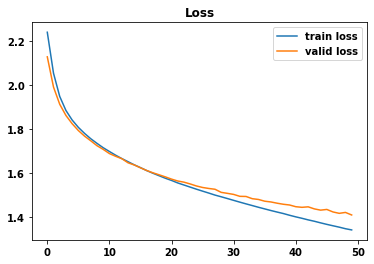

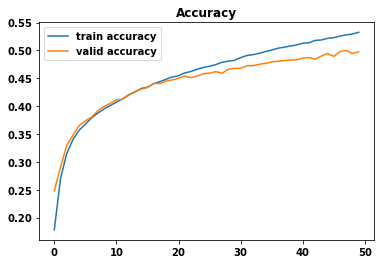

In [9]:
earlystop = EarlyStopping(monitor="val_loss", 
                          patience=25,
                          verbose=1
                          )
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
          )

    # Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()